# Question 1

### 1a

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [57]:
df= pd.read_csv('shopify_ds_challenge.csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [58]:
df['order_amount'].mean()

3145.128

Taking the mean of the order amount column gives the AOV of $3145.13, which is evidently unreasonable. To find potential things wrong with the data, first find the frequency of the total items as just by looking at the data, the mean does not account for the fact that an order can consist of multiple items being bought.

In [59]:
df['total_items'].value_counts()

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

From this, buying 2000 items 17 times is an unusually large transaction and should be investigated further. A scatterplot of the order ids versus order amounts would give visual insight into this.

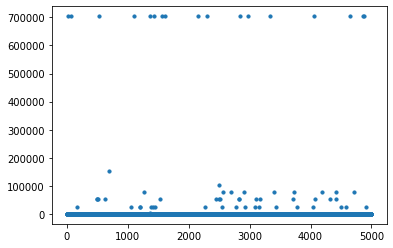

In [60]:
plt.scatter(x=data['order_id'], y=data['order_amount'], s=10)
plt.show()

The scatterplot confirms the outlier of the order amount over $700000.

In [61]:
df[df['order_amount']>=700000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


A quick analysis from the anomality is that it is all the values come from the same shop_id and user_id, shop 42, hence giving the suspicion it may have been done by error.

In [67]:
new_df=df.groupby(['shop_id'])["order_amount", "total_items"].apply(lambda x:x.astype(int).sum())
new_df['AOV']=new_df['order_amount']/new_df['total_items']
new_df.sort_values(['AOV'], ascending=[False])

/tmp/ipykernel_6146/644150202.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_df=df.groupby(['shop_id'])["order_amount", "total_items"].apply(lambda x:x.astype(int).sum())


,order_amount,total_items,AOV
shop_id,,,
12,18693,93,201.0
89,23128,118,196.0
99,18330,94,195.0
50,17756,92,193.0
38,13680,72,190.0
...,...,...,...
53,14560,130,112.0
100,8547,77,111.0
32,7979,79,101.0


From more analysis of grouping the shop_ids by the average amount ordered per item, shop 78 is evidently significiantly higher than the other shops and hence, is an outlier that should be investigated further. A better way to evaluate the data would be to remove outliers and divide the order amount by the total items and then take the average. 

### 1b

A metric I would report for this dataset would be either the median or percentiles to describe the data. Evidently, there are outliers, particularily from shops 42 and 78 that are heavily skewing the data and upon removing them, we could receive more reasonable results. The z-score would also be key in determining how many standard deviations a value is below or above the mean, hence identifying outliers in individual orders. 

In [64]:
df.drop(df.index[df['shop_id'] == 78], inplace = True)
df.drop(df.index[df['shop_id'] == 42], inplace = True)

In [65]:
df['order_amount'].mean()

300.1558229655313

In [66]:
df['order_amount'].describe(percentiles=[0.25, 0.5, 0.75, 0.95])

count    4903.000000
mean      300.155823
std       155.941112
min        90.000000
25%       163.000000
50%       284.000000
75%       386.500000
95%       588.000000
max      1086.000000
Name: order_amount, dtype: float64

The value is $300.16 for the mean and $284 for the median value, which is much more reasonable. 